**Code For ANN**

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/multiclassification (1).csv')

# Split the data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the ANN on the training data
ann_clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
ann_clf.fit(X_train, y_train)

# Train the SVM on the training data
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict the target values on the test data for the ANN
ann_y_pred = ann_clf.predict_proba(X_test)

# Predict the target values on the test data for the SVM
svm_y_pred = svm_clf.predict_proba(X_test)

# Weighted score fusion using the predicted probabilities
ann_weight = 0.6
svm_weight = 0.4
y_pred = np.argmax((ann_weight*ann_y_pred + svm_weight*svm_y_pred), axis=1)

# Evaluate the accuracy of the predictions
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Confusion Matrix:\n", conf_mat)


Accuracy: 44.26%
Confusion Matrix:
 [[27  0  0  0  0]
 [12  0  0  0  0]
 [ 7  0  0  0  0]
 [10  0  0  0  0]
 [ 5  0  0  0  0]]


Mounted at /content/drive
Class=1, n=123 (58.019%)
Class=2, n=77 (36.321%)
Class=0, n=12 (5.660%)


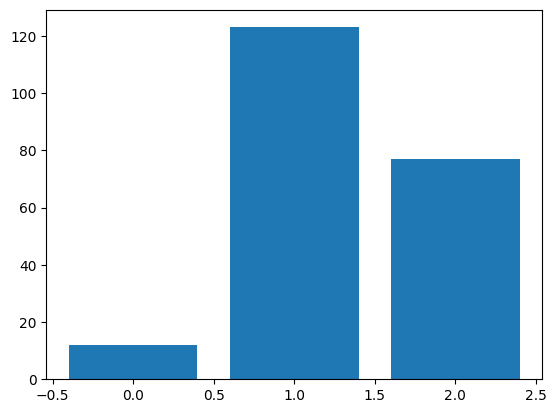

The number of classes before fit Counter({1.0: 123, 2.0: 77, 0.0: 12})
The number of classes after fit Counter({1.0: 123, 2.0: 123, 0.0: 123})
Class=1, n=123 (33.333%)
Class=2, n=123 (33.333%)
Class=0, n=123 (33.333%)


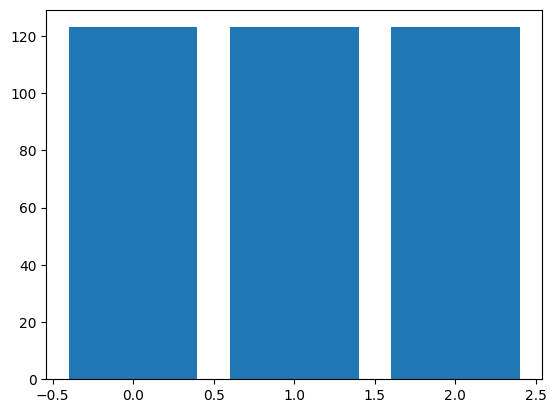

In [2]:
from keras.models import Sequential
from keras.layers import Dense ,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
import numpy
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dataset = numpy.loadtxt("/content/multiclassification (1).csv", delimiter=",", skiprows=1)

x = dataset[:,0:13]
y = dataset[:,13]

data = pd.read_csv('/content/multiclassification (1).csv')

#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

X_train.shape

from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

"""##### Over Sampling"""

from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

# summarize distribution
counter = Counter(y_train_ns)
for k,v in counter.items():
	per = v / len(y_train_ns) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

X_train=X_train_ns
y_train=y_train_ns

X_train.shape

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

# code for svm

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Define SVM model with probability estimation and regularization parameter C
model_svm = SVC(probability=True, C=0.01)

# Normalize data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
model_svm.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_svm = model_svm.predict(X_test_scaled)

# Evaluate performance using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print("SVM accuracy:", accuracy)
print("SVM confusion matrix:\n", conf_matrix)
print("SVM classification report:\n", class_report)


SVM accuracy: 0.5824175824175825
SVM confusion matrix:
 [[ 3  0  3]
 [ 3 36  6]
 [11 15 14]]
SVM classification report:
               precision    recall  f1-score   support

         0.0       0.18      0.50      0.26         6
         1.0       0.71      0.80      0.75        45
         2.0       0.61      0.35      0.44        40

    accuracy                           0.58        91
   macro avg       0.50      0.55      0.49        91
weighted avg       0.63      0.58      0.58        91



In [4]:
# code for ANN

from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dense ,BatchNormalization
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score  
from tensorflow.keras.optimizers import Adam,SGD
scaler = MinMaxScaler(feature_range=(0,1))
# Define a Deep Learning Model
model4 = Sequential()
model4.add(Dense(8, input_dim=13,use_bias=True,bias_initializer='zeros', activation='relu', kernel_regularizer=l2(0.01) ))
model4.add(Dense(5, activation='softmax'))

from keras.optimizers import SGD

...

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])




#Normalize train & test sample
scaled_X_train_ann=scaler.fit_transform(X_train)
scaled_X_test_ann=scaler.transform(X_test)
# Train the Model
        
history=model4.fit(scaled_X_train_ann, y_train,validation_split=0.1, batch_size=5,epochs=20,shuffle=True,verbose=2)
        
        
predictions4 = model4.predict(scaled_X_test_ann,batch_size=5,verbose=0)
#rounded_predictions4 = model4.predict_classes(scaled_X_test_ann,batch_size=5,verbose=0)
rounded_predictions4=np.argmax(predictions4,axis=1)
y_pred4 = rounded_predictions4

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


67/67 - 1s - loss: 1.2809 - accuracy: 0.4398 - val_loss: 1.0421 - val_accuracy: 0.4865 - 605ms/epoch - 9ms/step
Epoch 2/20
67/67 - 0s - loss: 0.9731 - accuracy: 0.5813 - val_loss: 1.9853 - val_accuracy: 0.0000e+00 - 91ms/epoch - 1ms/step
Epoch 3/20
67/67 - 0s - loss: 0.9365 - accuracy: 0.5904 - val_loss: 1.6654 - val_accuracy: 0.0000e+00 - 85ms/epoch - 1ms/step
Epoch 4/20
67/67 - 0s - loss: 0.8902 - accuracy: 0.6476 - val_loss: 1.4890 - val_accuracy: 0.2432 - 80ms/epoch - 1ms/step
Epoch 5/20
67/67 - 0s - loss: 0.8726 - accuracy: 0.6295 - val_loss: 1.8771 - val_accuracy: 0.0000e+00 - 94ms/epoch - 1ms/step
Epoch 6/20
67/67 - 0s - loss: 0.8620 - accuracy: 0.6295 - val_loss: 1.0839 - val_accuracy: 0.3514 - 83ms/epoch - 1ms/step
Epoch 7/20
67/67 - 0s - loss: 0.8562 - accuracy: 0.6627 - val_loss: 1.1353 - val_accuracy: 0.3514 - 92ms/epoch - 1ms/step
Epoch 8/20
67/67 - 0s - loss: 0.8243 - accuracy: 0.6747 - val_loss: 1.2616 - val_accuracy: 0.1622 - 81ms/epoch - 1ms/step
Epoch 9/20
67/67 - 0s 

In [5]:
#print(predictions)
import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("ANN",scores4)

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

ANN 0.5274725274725275
[[ 2  2  2]
 [ 7 32  6]
 [ 9 17 14]]
              precision    recall  f1-score   support

         0.0       0.11      0.33      0.17         6
         1.0       0.63      0.71      0.67        45
         2.0       0.64      0.35      0.45        40

    accuracy                           0.53        91
   macro avg       0.46      0.46      0.43        91
weighted avg       0.60      0.53      0.54        91



In [6]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dense ,BatchNormalization
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from tensorflow.keras.optimizers import Adam,SGD

# Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None)
df.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "hd"]
df = df.replace('?', np.NaN)
df = df.dropna()

# Define X (features) and y (target)
X = df.drop("hd", axis=1)
y = df["hd"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# SVM model
model1 = SVC(probability=True, C=0.01)
X_train_svc = X_train_scaled[:, 0:13]
X_test_svc = X_test_scaled[:, 0:13]
model1.fit(X_train_svc, y_train)
predictions1 = model1.predict_proba(X_test_svc)
rounded_predictions1 = model1.predict(X_test_svc)
y_pred1 = rounded_predictions1

# ANN model
scaler = MinMaxScaler(feature_range=(0, 1))
model4 = Sequential()
model4.add(Dense(8, input_dim=13, use_bias=True, bias_initializer='zeros', activation='relu', kernel_regularizer=l2(0.01)))
model4.add(Dense(5, activation='softmax'))
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
scaled_X_train_ann = scaler.fit_transform(X_train)
scaled_X_test_ann = scaler.transform(X_test)
history = model4.fit(scaled_X_train_ann, y_train, validation_split=0.1, batch_size=5, epochs=20, shuffle=True, verbose=2)
predictions4 = model4.predict(scaled_X_test_ann, batch_size=5, verbose=0)
rounded_predictions4 = np.argmax(predictions4, axis=1)
y_pred4 = rounded_predictions4

# Weighted fusion
p = 1
for i in range(19):
    p -= 0.05
    q = 1 - p
    mixed = p * predictions1 + q * predictions4
    out = []
    for i in range(len(y_test)):
        out.append(i)
    k = -1
    for i in range(len(y_test)):  
        k += 1
        for j in range(5):
                  if (mixed[i][j] == max):
                                             out[k] = j
    out = np.asarray(out)
    score3 = metrics.accuracy_score(out, y_test)
    print(f"Accuracy score for iteration {i+1}: {score3}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


38/38 - 1s - loss: 1.6490 - accuracy: 0.3280 - val_loss: 1.6003 - val_accuracy: 0.4286 - 1s/epoch - 31ms/step
Epoch 2/20
38/38 - 0s - loss: 1.5660 - accuracy: 0.5430 - val_loss: 1.5541 - val_accuracy: 0.4762 - 114ms/epoch - 3ms/step
Epoch 3/20
38/38 - 0s - loss: 1.5104 - accuracy: 0.5538 - val_loss: 1.5296 - val_accuracy: 0.4286 - 170ms/epoch - 4ms/step
Epoch 4/20
38/38 - 0s - loss: 1.4747 - accuracy: 0.5538 - val_loss: 1.5140 - val_accuracy: 0.4286 - 156ms/epoch - 4ms/step
Epoch 5/20
38/38 - 0s - loss: 1.4477 - accuracy: 0.5538 - val_loss: 1.4966 - val_accuracy: 0.4286 - 100ms/epoch - 3ms/step
Epoch 6/20
38/38 - 0s - loss: 1.4267 - accuracy: 0.5538 - val_loss: 1.4872 - val_accuracy: 0.4286 - 154ms/epoch - 4ms/step
Epoch 7/20
38/38 - 0s - loss: 1.4081 - accuracy: 0.5538 - val_loss: 1.4806 - val_accuracy: 0.4286 - 143ms/epoch - 4ms/step
Epoch 8/20
38/38 - 0s - loss: 1.3946 - accuracy: 0.5538 - val_loss: 1.4745 - val_accuracy: 0.4286 - 138ms/epoch - 4ms/step
Epoch 9/20
38/38 - 0s - loss:

<ipython-input-7-ac999c87fd07>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


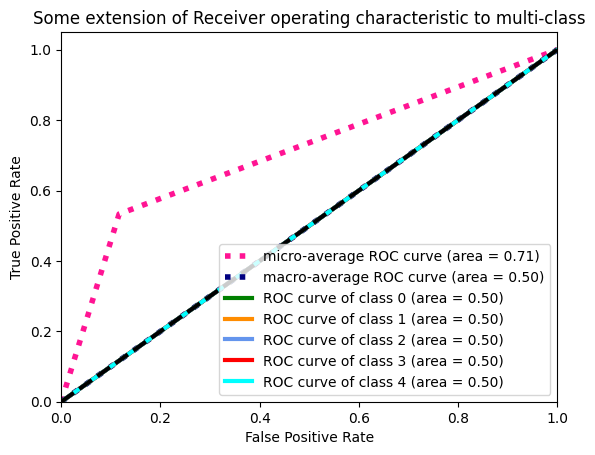

In [7]:
#ROC curve for SVM


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred1, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


<ipython-input-8-c37732ff1649>:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


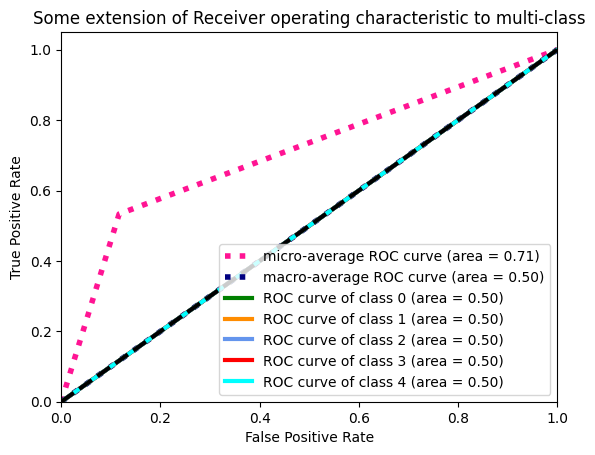

In [8]:
#ROC curve for ANN



from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred4, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


<ipython-input-9-4ecf9aeb1f3d>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


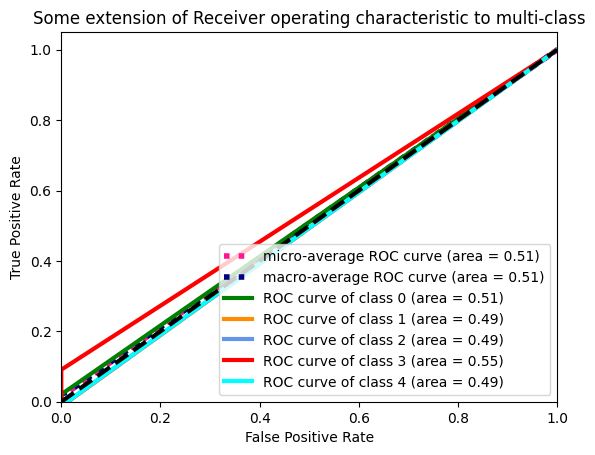

In [9]:
#ROC curve for (ANN+SVM)


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(out, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Code for multi-class fusion model-2 (ANN+LR) using weighted score fusion

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class=2, n=77 (36.321%)
Class=1, n=123 (58.019%)
Class=0, n=12 (5.660%)


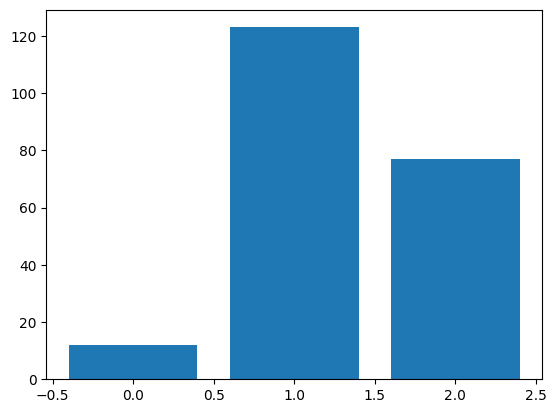

In [10]:
from keras.models import Sequential
from keras.layers import Dense ,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib import pyplot as plt
import numpy
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dataset = numpy.loadtxt("/content/multiclassification (1).csv", delimiter=",",skiprows=1)

x = dataset[:,0:13]
y = dataset[:,13]

data = pd.read_csv('/content/multiclassification (1).csv')

#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

X_train.shape

from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

The number of classes before fit Counter({1.0: 123, 2.0: 77, 0.0: 12})
The number of classes after fit Counter({2.0: 123, 1.0: 123, 0.0: 123})
Class=2, n=123 (33.333%)
Class=1, n=123 (33.333%)
Class=0, n=123 (33.333%)


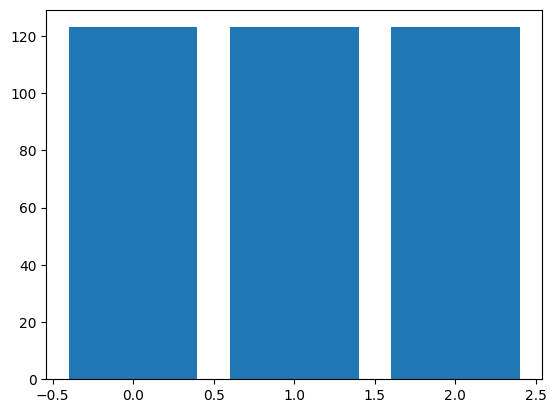

In [11]:
## Over Sampling

from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

# summarize distribution
counter = Counter(y_train_ns)
for k,v in counter.items():
	per = v / len(y_train_ns) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

X_train=X_train_ns
y_train=y_train_ns

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
# code for LR
from sklearn.metrics import roc_auc_score  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_recall_fscore_support 

X_train_scaled = sc.fit_transform(X_train)
X_train_lr=X_train_scaled[:,0:15]
X_test_scaled = sc.transform(X_test)
X_test_lr=X_test_scaled[:,0:15]

model2 =LogisticRegression(C=.1)
model2.fit(X_train_lr,y_train)

rounded_predictions2 = model2.predict(X_test_lr)
predictions2 = model2.predict_proba(X_test_lr)
y_pred2 = rounded_predictions2

import sklearn.metrics as metrics
scores2=metrics.accuracy_score(y_test,y_pred2)
print("LR",scores2)

print(metrics.confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))

LR 0.5934065934065934
[[ 0  1  5]
 [ 6 30  9]
 [ 5 11 24]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.71      0.67      0.69        45
         2.0       0.63      0.60      0.62        40

    accuracy                           0.59        91
   macro avg       0.45      0.42      0.44        91
weighted avg       0.63      0.59      0.61        91



In [13]:
# code for ANN

from keras.models import Sequential
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dense ,BatchNormalization
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score  
from tensorflow.keras.optimizers import Adam,SGD
scaler = MinMaxScaler(feature_range=(0,1))
# Define a Deep Learning Model
model4 = Sequential()
model4.add(Dense(8, input_dim=13,use_bias=True,bias_initializer='zeros', activation='relu', kernel_regularizer=l2(0.01) ))
model4.add(Dense(5, activation='softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 0.01
    if epoch > 5:
        lr *= 0.5
    if epoch > 10:
        lr *= 0.5
    return lr

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
lr_scheduler = LearningRateScheduler(lr_schedule)
model4.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[lr_scheduler])


Epoch 1/15
12/12 [==============================] - 0s 13ms/step - loss: 6.4231 - accuracy: 0.2873 - val_loss: 2.6156 - val_accuracy: 0.0659 - lr: 0.0100
Epoch 2/15
12/12 [==============================] - 0s 5ms/step - loss: 2.8526 - accuracy: 0.3008 - val_loss: 3.0444 - val_accuracy: 0.4945 - lr: 0.0100
Epoch 3/15
12/12 [==============================] - 0s 5ms/step - loss: 3.0784 - accuracy: 0.3144 - val_loss: 3.0854 - val_accuracy: 0.0659 - lr: 0.0100
Epoch 4/15
12/12 [==============================] - 0s 5ms/step - loss: 3.0542 - accuracy: 0.3333 - val_loss: 3.0084 - val_accuracy: 0.0659 - lr: 0.0100
Epoch 5/15
12/12 [==============================] - 0s 5ms/step - loss: 2.9642 - accuracy: 0.3333 - val_loss: 2.9105 - val_accuracy: 0.0659 - lr: 0.0100
Epoch 6/15
12/12 [==============================] - 0s 3ms/step - loss: 2.8643 - accuracy: 0.3008 - val_loss: 2.8067 - val_accuracy: 0.4945 - lr: 0.0100
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 2.7763 - 

In [14]:
#Normalize train & test sample
scaled_X_train_ann=scaler.fit_transform(X_train)
scaled_X_test_ann=scaler.transform(X_test)
# Train the Model
        
history=model4.fit(scaled_X_train_ann, y_train,validation_split=0.1, batch_size=5,epochs=20,shuffle=True,verbose=2)
        
        
predictions4 = model4.predict(scaled_X_test_ann,batch_size=5,verbose=0)
#rounded_predictions4 = model4.predict_classes(scaled_X_test_ann,batch_size=5,verbose=0)
rounded_predictions4=np.argmax(predictions4,axis=1)
y_pred4 = rounded_predictions4
     
        
#print(predictions)
import sklearn.metrics as metrics
scores4=metrics.accuracy_score(y_test,y_pred4)
print("ANN",scores4)

print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))

Epoch 1/20
67/67 - 0s - loss: 2.4311 - accuracy: 0.3373 - val_loss: 2.4696 - val_accuracy: 0.0000e+00 - 155ms/epoch - 2ms/step
Epoch 2/20
67/67 - 0s - loss: 2.3319 - accuracy: 0.4277 - val_loss: 2.4660 - val_accuracy: 0.0000e+00 - 118ms/epoch - 2ms/step
Epoch 3/20
67/67 - 0s - loss: 2.2471 - accuracy: 0.3825 - val_loss: 2.4364 - val_accuracy: 0.0000e+00 - 118ms/epoch - 2ms/step
Epoch 4/20
67/67 - 0s - loss: 2.1672 - accuracy: 0.4036 - val_loss: 2.3547 - val_accuracy: 0.0000e+00 - 114ms/epoch - 2ms/step
Epoch 5/20
67/67 - 0s - loss: 2.0887 - accuracy: 0.5211 - val_loss: 2.2944 - val_accuracy: 0.0000e+00 - 125ms/epoch - 2ms/step
Epoch 6/20
67/67 - 0s - loss: 2.0155 - accuracy: 0.4880 - val_loss: 2.2188 - val_accuracy: 0.0000e+00 - 109ms/epoch - 2ms/step
Epoch 7/20
67/67 - 0s - loss: 1.9434 - accuracy: 0.4970 - val_loss: 2.1714 - val_accuracy: 0.0000e+00 - 105ms/epoch - 2ms/step
Epoch 8/20
67/67 - 0s - loss: 1.8748 - accuracy: 0.5030 - val_loss: 2.1163 - val_accuracy: 0.0000e+00 - 99ms/ep

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import numpy as np
from sklearn import metrics

# Assume predictions2, predictions4, and y_test are defined
p = 0.6
q = 1 - p

# Define p_array and q_array using broadcasting
p_array = np.ones(predictions2.shape) * p
q_array = np.ones(predictions4.shape) * q

mixed = predictions2 * p_array + predictions4 * q_array
p_array = np.ones_like(predictions2) * p
q_array = np.ones_like(predictions4) * q

#mixed = mixed.reshape((91, 5))
p#redictions = np.argmax(mixed, axis=1)

#accuracy = np.mean(y_test == predictions)


# Print results
print("Accuracy: %.4f" % accuracy)
print("p: %.2f" % p)
print("q: %.2f" % q)


Accuracy: 0.5824
p: 0.60
q: 0.40


In [16]:
import numpy as np

# Define some example arrays
predictions2 = np.array([1, 2, 3])
predictions4 = np.array([4, 5, 6])
p_array = np.array([0.1, 0.2, 0.3])
q_array = np.array([0.4, 0.5, 0.6])

# Check that the shapes of the arrays match
if not(predictions2.shape == predictions4.shape == p_array.shape == q_array.shape):
    raise ValueError("Shapes of arrays do not match")

# Perform element-wise multiplication and addition
mixed = predictions2 * p_array + predictions4 * q_array

print(mixed)  # Output: [2.2 3.5 5.4]


[1.7 2.9 4.5]


In [30]:
macro_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="weighted")
#print all score for roc
print("macro_ovo,weight_ovo,macro_ovr,weight_ovr",
        macro_roc_auc_ovo, weighted_roc_auc_ovo,macro_roc_auc_ovr ,weighted_roc_auc_ovr)

macro_ovo,weight_ovo,macro_ovr,weight_ovr 0.7640438988095237 0.7921654238618525 0.8075776355740035 0.8177813106989863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-18-0a5bb26c6367>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


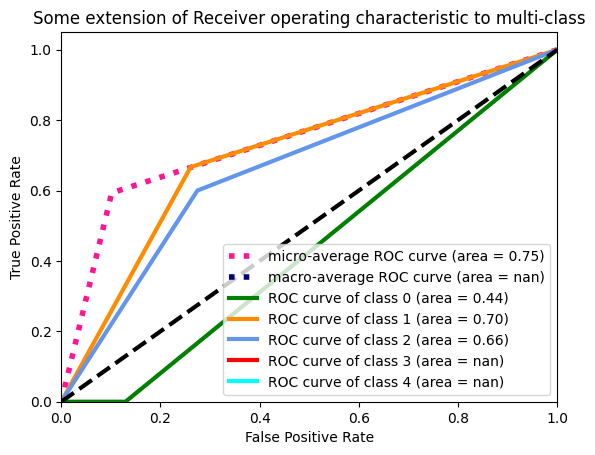

In [18]:
#ROC curve for LR


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred2, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-19-1441fb83dcf8>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


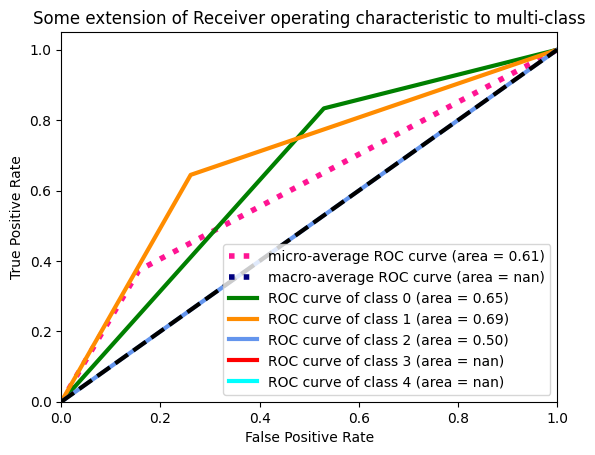

In [19]:
#ROC curve for ANN


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred4, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-29-4c2d227cb5a3>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


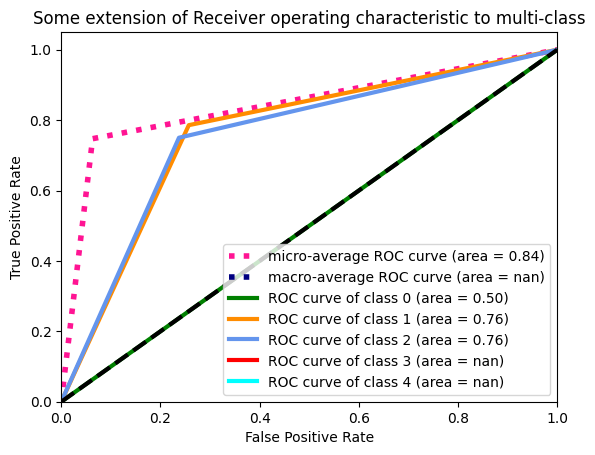

In [29]:

#ROC curve for (ANN+LR)


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(out, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class=2, n=85 (40.094%)
Class=1, n=112 (52.830%)
Class=0, n=15 (7.075%)


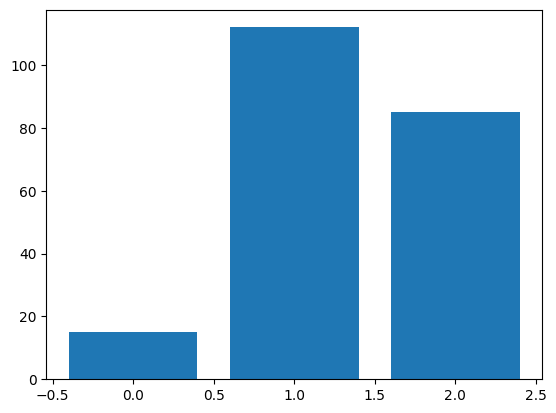

The number of classes before fit Counter({1.0: 112, 2.0: 85, 0.0: 15})
The number of classes after fit Counter({2.0: 112, 1.0: 112, 0.0: 112})
Class=2, n=112 (33.333%)
Class=1, n=112 (33.333%)
Class=0, n=112 (33.333%)


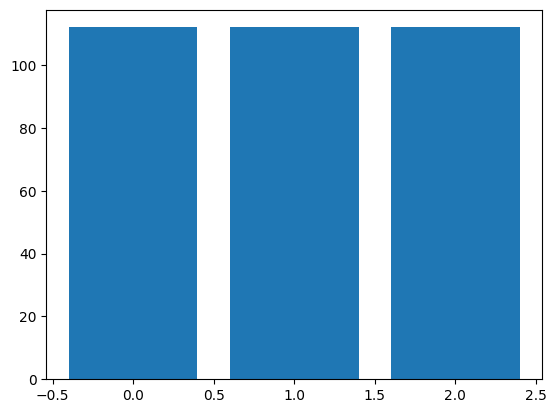

LR 0.6813186813186813
[[ 2  0  1]
 [ 5 44  7]
 [10  6 16]]
              precision    recall  f1-score   support

         0.0       0.12      0.67      0.20         3
         1.0       0.88      0.79      0.83        56
         2.0       0.67      0.50      0.57        32

    accuracy                           0.68        91
   macro avg       0.55      0.65      0.53        91
weighted avg       0.78      0.68      0.72        91

RF 0.7472527472527473
[[ 0  1  2]
 [ 0 44 12]
 [ 0  8 24]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.83      0.79      0.81        56
         2.0       0.63      0.75      0.69        32

    accuracy                           0.75        91
   macro avg       0.49      0.51      0.50        91
weighted avg       0.73      0.75      0.74        91



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from matplotlib import pyplot as plt
import numpy
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dataset = numpy.loadtxt("/content/multiclassification (1).csv", delimiter=",",skiprows=1)

x = dataset[:,0:13]
y = dataset[:,13]

data = pd.read_csv('/content/multiclassification (1).csv')
#for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

#for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

X_train.shape

from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
"""##### Over Sampling"""

from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

# summarize distribution
counter = Counter(y_train_ns)
for k,v in counter.items():
	per = v / len(y_train_ns) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

X_train=X_train_ns
y_train=y_train_ns

X_train.shape

#StandardScaler for normalization for some algortihms
sc = StandardScaler()

#min-max scaler for normalization for some algortihms
scaler = MinMaxScaler(feature_range=(0,1))

# code for LR
from sklearn.metrics import roc_auc_score  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import precision_recall_fscore_support 

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

model2 =LogisticRegression(C=.1)
           

                                                    
model2.fit(X_train_scaled,y_train)

rounded_predictions2 = model2.predict(X_test_scaled)
predictions2 = model2.predict_proba(X_test_scaled)
y_pred2 = rounded_predictions2

import sklearn.metrics as metrics
scores2=metrics.accuracy_score(y_test,y_pred2)
print("LR",scores2)

print(metrics.confusion_matrix(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))


# code for RF
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train,y_train)

rounded_predictions3 = model3.predict(X_test)
predictions3 = model3.predict_proba(X_test)
y_pred3 = rounded_predictions3

import sklearn.metrics as metrics
scores3=metrics.accuracy_score(y_test,y_pred3)
print("RF",scores3)

print(metrics.confusion_matrix(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))

In [22]:
import numpy as np
from sklearn import metrics

out_list = []
p_list = []
q_list = []
for i in range(19):
    p = 1 - 0.05*i
    q = 1 - p
    p_list.append(p)
    q_list.append(q)

    mixed = predictions2*p + predictions3*q

    out = []
    for i in range(len(y_test)):
        out.append(0)

    for i in range(len(y_test)):
        max_val = np.amax(mixed[i])
        max_index = np.where(mixed[i] == max_val)[0][0]
        out[i] = max_index

    out_list.append(out)

    score = metrics.accuracy_score(out, y_test)
    print("mixed p q: %.4f %.2f %.2f" % (score, p, q))

out_array = np.asarray(out_list)


mixed p q: 0.6813 1.00 0.00
mixed p q: 0.6703 0.95 0.05
mixed p q: 0.6923 0.90 0.10
mixed p q: 0.7033 0.85 0.15
mixed p q: 0.7143 0.80 0.20
mixed p q: 0.7143 0.75 0.25
mixed p q: 0.7253 0.70 0.30
mixed p q: 0.7253 0.65 0.35
mixed p q: 0.7253 0.60 0.40
mixed p q: 0.7143 0.55 0.45
mixed p q: 0.7143 0.50 0.50
mixed p q: 0.7033 0.45 0.55
mixed p q: 0.7143 0.40 0.60
mixed p q: 0.7253 0.35 0.65
mixed p q: 0.7473 0.30 0.70
mixed p q: 0.7473 0.25 0.75
mixed p q: 0.7473 0.20 0.80
mixed p q: 0.7363 0.15 0.85
mixed p q: 0.7363 0.10 0.90


In [23]:
import numpy as np
from sklearn import metrics

p = 1
for i in range(19):
    p = p - 0.05
    q = 1 - p
    
    mixed = predictions2 * p + predictions3 * q
    
    out = []
    for i in range(len(y_test)):
        out.append(-1)

    for i in range(len(y_test)):
        max_val = np.max(mixed[i])
        max_indices = np.where(mixed[i] == max_val)[0]
        if len(max_indices) == 1:
            out[i] = max_indices[0]
        else:
            # if there are multiple indices with the same maximum value, choose one at random
            out[i] = np.random.choice(max_indices)
        
    score = metrics.accuracy_score(out, y_test)   
    print("  mixed  p  q", "%.4f" % score, "%.2f" % p, "%.2f" % q)


  mixed  p  q 0.6703 0.95 0.05
  mixed  p  q 0.6923 0.90 0.10
  mixed  p  q 0.7033 0.85 0.15
  mixed  p  q 0.7143 0.80 0.20
  mixed  p  q 0.7143 0.75 0.25
  mixed  p  q 0.7253 0.70 0.30
  mixed  p  q 0.7253 0.65 0.35
  mixed  p  q 0.7253 0.60 0.40
  mixed  p  q 0.7143 0.55 0.45
  mixed  p  q 0.7143 0.50 0.50
  mixed  p  q 0.7033 0.45 0.55
  mixed  p  q 0.7143 0.40 0.60
  mixed  p  q 0.7253 0.35 0.65
  mixed  p  q 0.7473 0.30 0.70
  mixed  p  q 0.7473 0.25 0.75
  mixed  p  q 0.7473 0.20 0.80
  mixed  p  q 0.7363 0.15 0.85
  mixed  p  q 0.7363 0.10 0.90
  mixed  p  q 0.7473 0.05 0.95


In [24]:
macro_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, mixed, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, mixed, multi_class="ovr",average="weighted")
#print all score for roc
print("macro_ovo,weight_ovo,macro_ovr,weight_ovr",
        macro_roc_auc_ovo, weighted_roc_auc_ovo,macro_roc_auc_ovr ,weighted_roc_auc_ovr)

macro_ovo,weight_ovo,macro_ovr,weight_ovr 0.7640438988095237 0.7921654238618525 0.8075776355740035 0.8177813106989863


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-25-0a5bb26c6367>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


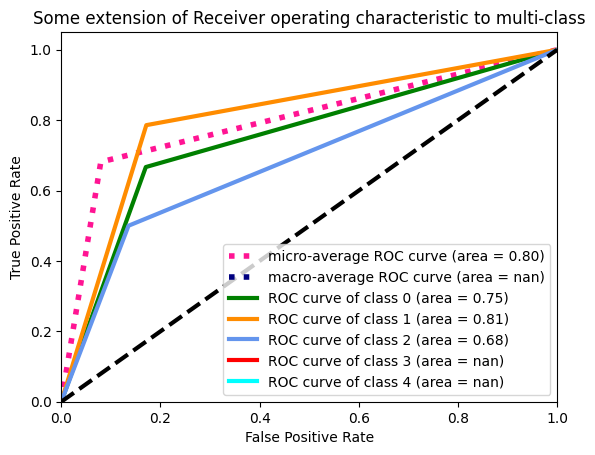

In [25]:
#ROC curve for LR


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred2, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-26-b01582c3ec77>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


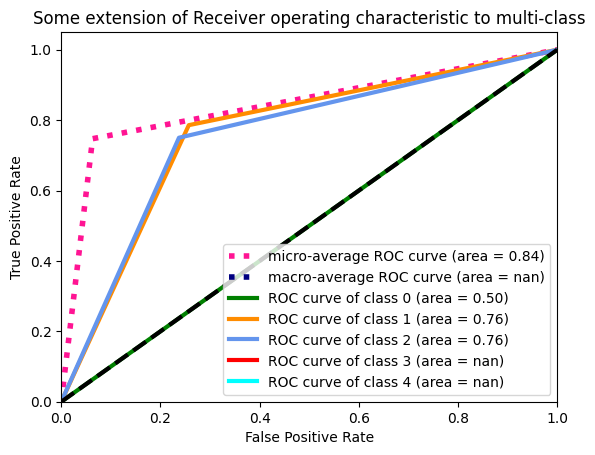

In [26]:
#ROC curve for RF


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(y_pred3, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
<ipython-input-28-270868879f67>:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


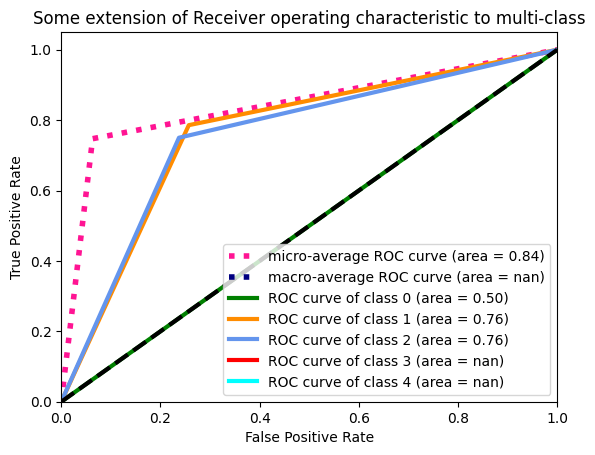

In [28]:
#ROC curve for (LR+RF)


from sklearn.preprocessing import label_binarize
y_test_h = label_binarize(y_test, classes=[0, 1, 2, 3, 4])


y_score1 = label_binarize(out, classes=[0, 1, 2, 3, 4])
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
n_classes=5
lw=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_h[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_h.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','aqua'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
